In [1]:
import sys
sys.path.append("../scripts/")
from dijkstra import *
import math
from matplotlib.animation import PillowWriter    #アニメーション保存用

In [2]:
class Astar(Dijkstra):
    def __init__(self, grid_map_world):
        super(Astar, self).__init__(grid_map_world)
    
    def draw(self, ax, elems):
        if not(self.isClosed(self.world.goal_index)): #ゴールにたどり着いていなければコストを計算
            index, cost = self.Astar()    #A*による探索
            
            #評価をカラーマップに出力する場合はこの部分のコメントをアウトを外す
            #マップに合わせて調整が必要
            #cost_adj1, cost_adj2 = 35.0, 36.35    #map1
            cost_adj1, cost_adj2 = 7.0, 27.9    #map2
            #cost_adj1, cost_adj2 = 3.7, 27.9    #map3
            self.drawCost(index, cost, ax, elems, cost_adj1, cost_adj2)
        else:
            #経路の描画
            if(self.flag_path_draw == 0):
                self.getPath()    #経路の算出
                self.drawPath(ax, elems)    #経路の描画
                self.flag_path_draw = 1
                
    def Astar(self):
        val = np.argmin(self.open_list, axis=0) #評価マップの中から最も小さいもの抽出
        grid_id, cost_f, cost_g = self.open_list[val[1]]
        index = [np.where(self.id_map==grid_id)[0][0], np.where(self.id_map==grid_id)[1][0]]
        self.open_list.remove([grid_id, cost_f, cost_g])  #オープンリストから削除
        self.closed_list.append([grid_id, cost_f, cost_g])  #クローズドリストに追加
        self.calculateCost(index, cost_f, cost_g)    #コストの計算
        return index, cost_f
    
    def calculateCost(self, index, cost_f, cost_g):
        #コストの計算
        for n in self.listNeigbor(index):
            evaluation_f = cost_g + self.cost(n) + self.c(n, index) + self.h(n)   #評価を計算
            if(self.isOpened(n)): #オープンリストに含まれているか
                its_index, its_cost_f, its_cost_g = self.open_list[[val[0] for val in self.open_list].index(self.id(n))]
                if(its_cost_f > evaluation_f): #評価が更新されなければ繰り返しを戻す
                    self.open_list.remove([its_index, its_cost_f, its_cost_g])
                else:
                    continue;
            elif(self.isClosed(n)): #クローズドリストに含まれているか 
                its_index, its_cost_f, its_cost_g = self.closed_list[[val[0] for val in self.closed_list].index(self.id(n))]
                if(its_cost_f > evaluation_f):
                    self.closed_list.remove([its_index, its_cost_f, its_cost_g])  
                else:
                    continue;
            self.parent_id_map[n[0]][n[1]] = self.id(index)
            self.open_list.append([self.id(n), evaluation_f, evaluation_f - self.h(n)])

    def h(self, u):
        return 1*math.sqrt((self.world.goal_index[0]-u[0])**2+(self.world.goal_index[1]-u[1])**2)

<IPython.core.display.Javascript object>


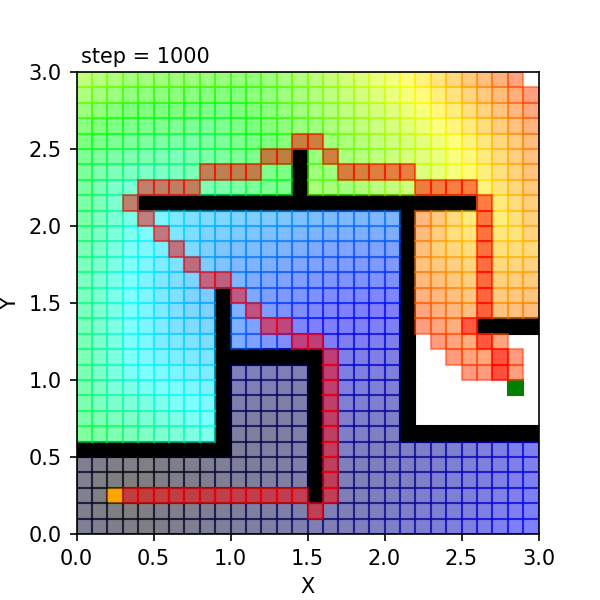

In [3]:
if __name__ == "__main__":
    time_span = 10
    time_interval = 0.01
    
    grid_step = np.array([0.1, 0.1])
    grid_num = np.array([30, 30])
    
    map_data = "../csvmap/map2.csv"
    
    world = GridMapWorld(grid_step, grid_num, time_span, time_interval, map_data, debug=False)
    world.append(Astar(world))
    
    world.draw()
    #world.ani.save('astar_map1.gif', writer='pillow', fps=100)    #アニメーション保存